# Aerodynamics: Stream Functions & Potential Functions

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install ipywidgets

In [6]:
import pandas as pd
import numpy as np

In [7]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [8]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

# Set range
xr = 10
xl = -xr

yu = 10
yl = -yu

In [9]:
# Set x, y  points
npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)

X, Y = np.meshgrid(x, y)

$$\text{Some useful conversions:}\\$$
$$r = x / cos\theta$$  
$$r = y / sin\theta$$  
$$r = \sqrt{x^2+y^2}$$  
$$\theta = tan^{-1}(y/x)$$
$$\theta = sin^{-1}(y/r)$$
$$\theta = cos^{-1}(x/r)$$

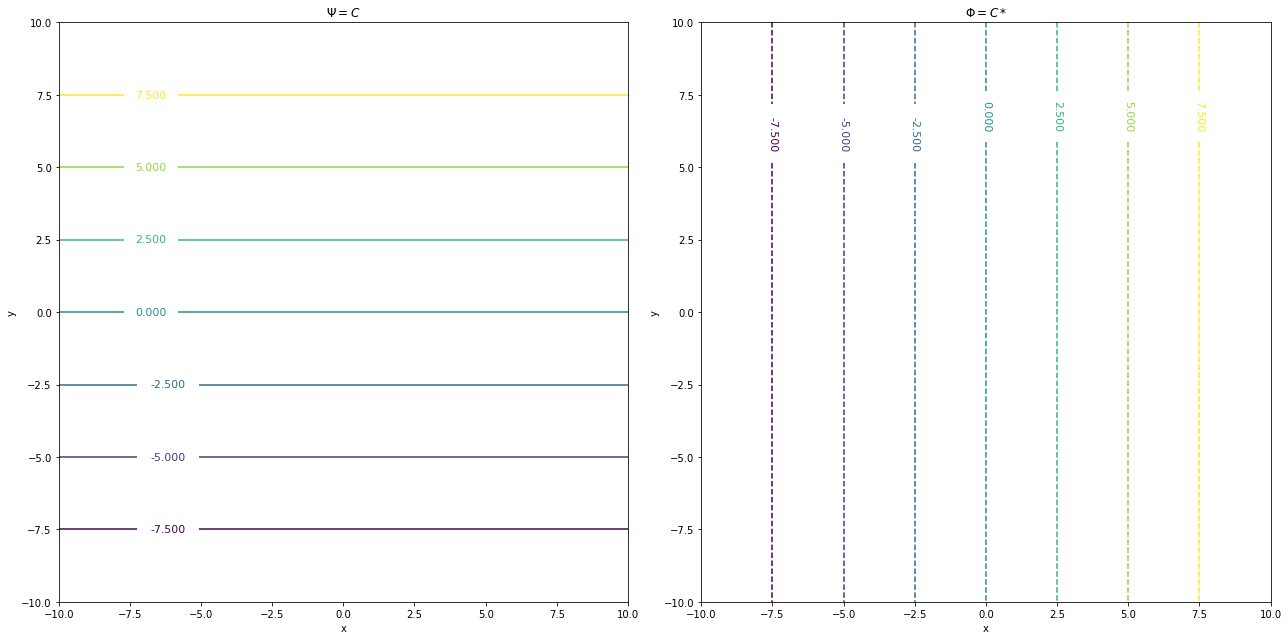

In [10]:
# Uniform Flow

# Set freestream velocity
Vinf = 1 # (units: m/s)
plt.rcParams["figure.figsize"] = (18,9)

plt.subplot(1,2,1)
Z = Vinf * Y
CS = plt.contour(X, Y, Z)

plt.clabel(CS, inline=1, fontsize=11)
plt.title('$\Psi=C$')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,2,2)
Z = Vinf * X
CS = plt.contour(X, Y, Z,linestyles='dashed')
plt.clabel(CS, inline=1, fontsize=11)

plt.title('$\Phi=C*$')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

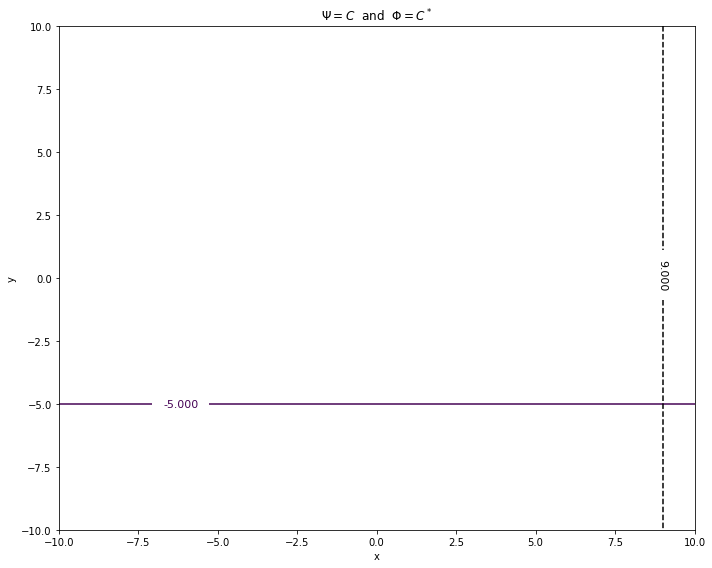

In [11]:
# Uniform Flow interactive chart


def uniformPlot(C, C_star):
    # Set freestream velocity
    Vinf = 1 # (units: m/s)
    plt.rcParams["figure.figsize"] = (10,8)
    # Set range
    xr = 10
    xl = -xr
    yu = 10
    yl = -yu
    
    # Set x, y  points
    npoints = 100
    x = np.linspace(xl, xr, npoints)
    y = np.linspace(yl, yu, npoints)
    X, Y = np.meshgrid(x, y)    
    
    Z = Vinf * Y
    CS = plt.contour(X, Y, Z,levels=[C])
    Z = Vinf * X
    CS2 = plt.contour(X, Y, Z,levels=[C_star], colors='k',linestyles='dashed')
    plt.clabel(CS2, inline=1, fontsize=11)
    linestyles = ['-', '--']
    plt.clabel(CS, inline=1, fontsize=11)
    plt.title(r'$\Psi=C$  and  $\Phi = C^*$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()
    
interactive_plot = interactive(uniformPlot, C=widgets.FloatSlider(value=2,min=-9,max=9,step=1,description='$C$'), C_star=widgets.FloatSlider(value=2,min=-9,max=9,step=1,description='$C^*$'));
interactive_plot.children[0].layout.height = '30px'
interactive_plot.children[0].layout.width = '500px'
interactive_plot.children[1].layout.height = '30px'
interactive_plot.children[1].layout.width = '500px'
interactive_plot




$$\text{Uniform Flow}$$
$$\Psi = V_\infty x$$
$$\Phi = V_\infty y$$

<function matplotlib.pyplot.show>

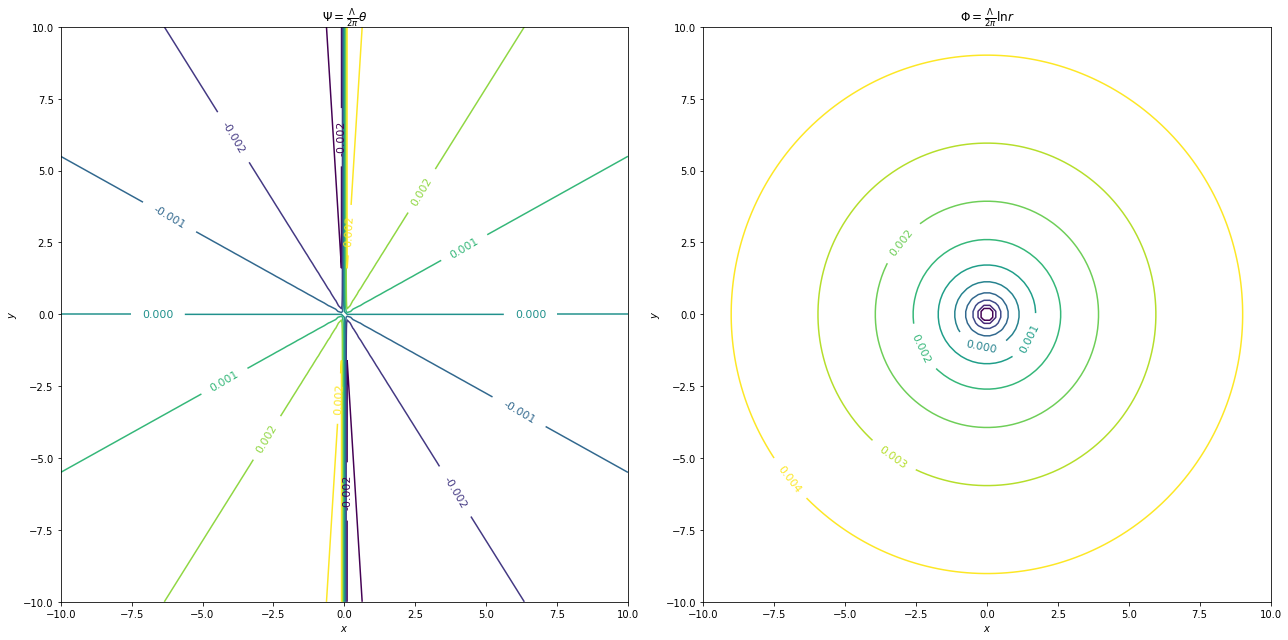

In [12]:
# Source Flow

# Set freestream velocity
#Lambda = 2 * np.pi #  Set for convenience

Lambda = 0.01

plt.rcParams["figure.figsize"] = (18,9)

plt.subplot(1,2,1)
Z = (Lambda)/(2 * np.pi) * np.arctan(Y/X)
#Z=(Lambda)/(2 * np.pi) * np.arctan2(Y,X)
levels = np.linspace(np.min(Z),0.0035,11)
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=11)
#plt.axis('equal','box')
#plt.title('Simplest default with labels')
plt.title(r'$\Psi =\frac{\Lambda}{2 \pi}\theta$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.subplot(1,2,2)
Z = (Lambda)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )

#plt.contour(Z,np.linspace(Z.min(),Z.max(),15))
levels = np.linspace(np.min(Z),0.0035,11)


CS = plt.contour(X, Y, Z, levels=levels)
#CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=11)


plt.title(r'$\Phi = \frac{\Lambda}{2 \pi} \ln r $')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.tight_layout()
plt.show

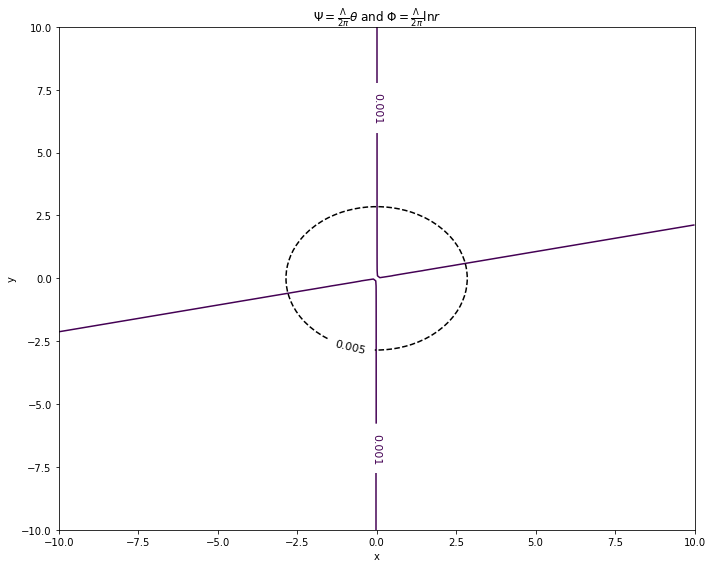

In [13]:
# Source Flow interactive chart

def sourcePlot(C, C2, Lambda):
    # Set freestream velocity
    Vinf = 1 # (units: m/s)
    plt.rcParams["figure.figsize"] = (10,8)
    # Set range
    xr = 10
    xl = -xr
    yu = 10
    yl = -yu
    
    #Lambda = 0.05
    
    # Set x, y  points
    npoints = 100
    x = np.linspace(xl, xr, npoints)
    y = np.linspace(yl, yu, npoints)
    X, Y = np.meshgrid(x, y)
    
    
    Z = (Lambda)/(2 * np.pi) * np.arctan(Y/X)
    #Z=(Lambda)/(2 * np.pi) * np.arctan2(Y,X)
    CS = plt.contour(X, Y, Z, levels=[C])
    plt.clabel(CS, inline=1, fontsize=11)

    Z = (Lambda)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )
    CS2 = plt.contour(X, Y, Z, levels=[C2], colors='k',linestyles='dashed')
    plt.clabel(CS2, inline=1, fontsize=11)
    
    plt.title(r'$\Psi =\frac{\Lambda}{2 \pi}\theta$ and $\Phi = \frac{\Lambda}{2 \pi} \ln r $')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()
    
interactive_plot = interactive(sourcePlot, C=widgets.FloatSlider(value=0.001,min=-0.01,max=0.01,step=0.00025,description='$\Psi$'), C2=widgets.FloatSlider(value=0.005,min=-0.01,max=0.01,step=0.00025,description='$\Phi$'), Lambda=widgets.FloatSlider(value=0.03,min=0.01,max=0.1,step=0.01,description='$\Lambda$'));
interactive_plot.children[0].layout.height = '30px'
interactive_plot.children[0].layout.width = '500px'
interactive_plot.children[0].readout_format = '.4f'
interactive_plot.children[1].layout.height = '30px'
interactive_plot.children[1].layout.width = '500px'
interactive_plot.children[1].readout_format = '.4f'
interactive_plot.children[2].layout.height = '30px'
interactive_plot.children[2].layout.width = '500px'
interactive_plot.children[2].readout_format = '.4f'
interactive_plot
#print(interactive_plot.children[1].keys)

$$\text{Source Flow}$$
$$\Psi = \frac{\Lambda}{2 \pi} \theta\\$$
$$\Phi = \frac{\Lambda}{2 \pi} \ln r $$

<function matplotlib.pyplot.show>

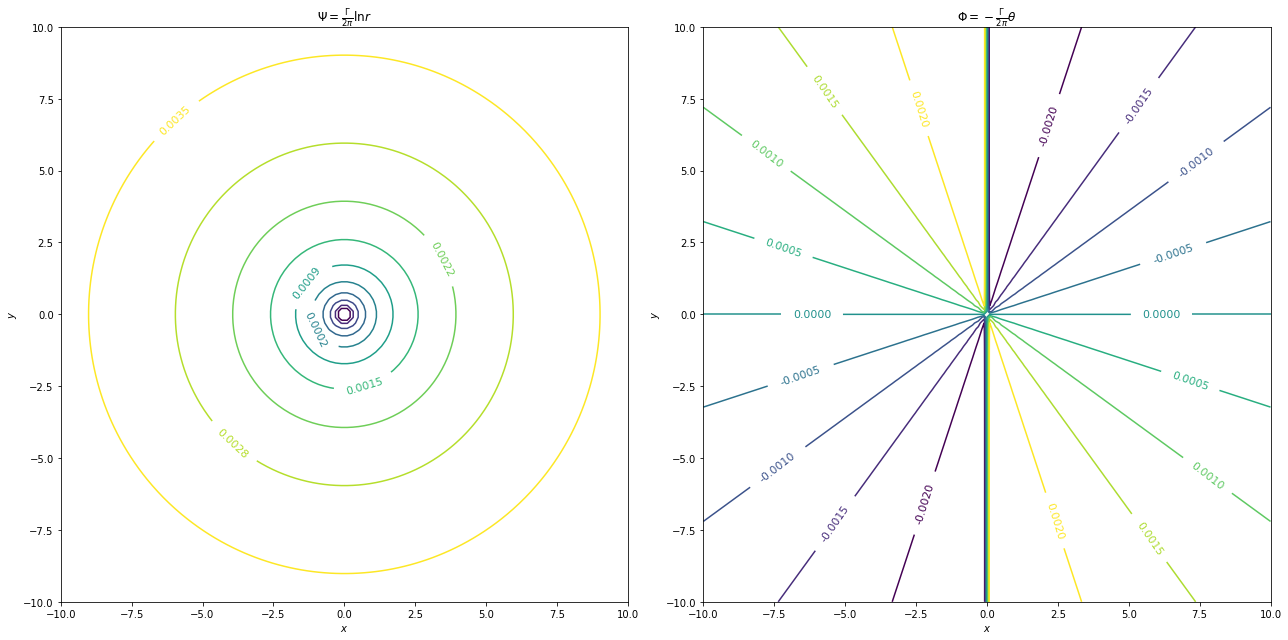

In [14]:
# Vortex Flow

# Set freestream velocity
#Gamma = 2 * np.pi #  Set for convenience

Gamma = 0.01

plt.rcParams["figure.figsize"] = (18,9)


plt.subplot(1,2,1)
Z = (Gamma)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )


#CS = plt.contour(X, Y, Z)
levels = np.linspace(np.min(Z),np.max(Z)/1.125,11)
levels = np.linspace(np.min(Z),0.0035,11)


CS = plt.contour(X, Y, Z, levels=levels)
fmt='%1.4f'
plt.clabel(CS, inline=1, fontsize=11,fmt=fmt)
plt.title(r'$\Psi = \frac{\Gamma}{2 \pi} \ln r$')
plt.xlabel('$x$')
plt.ylabel('$y$')


plt.subplot(1,2,2)
#Z = (Lambda)/(2 * np.pi) * np.log( np.power(X,2) + np.power(Y,2) )
Z = -(Gamma)/(2 * np.pi) * np.arctan(Y/X)

#plt.contour(Z,np.linspace(Z.min(),Z.max(),15))
levels = np.linspace(np.min(Z),np.max(Z),11)
CS = plt.contour(X, Y, Z, levels=levels)
#fmt = matplotlib.ticker.EngFormatter()
plt.clabel(CS, inline=1, fontsize=11, fmt=fmt)
#plt.clabel(CS, inline=1, fontsize=11)



#plt.axis('equal','box')
#plt.title('Simplest default with labels')
plt.title(r'$\Phi = -\frac{\Gamma}{2 \pi} \theta$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.tight_layout()
plt.show

$$\text{Vortex Flow}$$
$$\Psi = \frac{\Gamma}{2 \pi} \ln r \\$$
$$\Phi = -\frac{\Gamma}{2 \pi} \theta$$

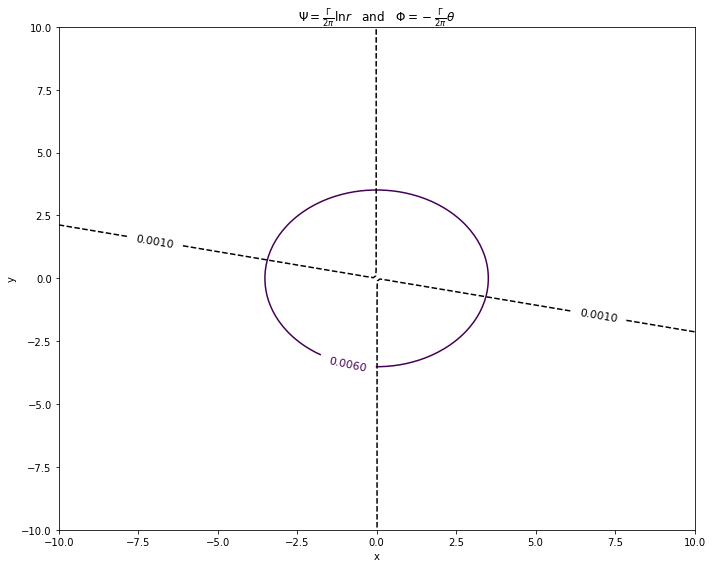

In [15]:
# Vortex Flow interactive chart

def vortexPlot(C, C2, Gamma):
    # Set freestream velocity
    Vinf = 1 # (units: m/s)
    plt.rcParams["figure.figsize"] = (10,8)
    # Set range
    xr = 10
    xl = -xr
    yu = 10
    yl = -yu
       
    # Set x, y  points
    npoints = 100
    x = np.linspace(xl, xr, npoints)
    y = np.linspace(yl, yu, npoints)
    X, Y = np.meshgrid(x, y)
    
    
    Z = (Gamma)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )
    CS = plt.contour(X, Y, Z, levels=[C])
    fmt='%1.4f'
    plt.clabel(CS, inline=1, fontsize=11, fmt=fmt)
    

    Z = -(Gamma)/(2 * np.pi) * np.arctan(Y/X)
    CS2 = plt.contour(X, Y, Z, levels=[C2], colors='k',linestyles='dashed')
    plt.clabel(CS2, inline=1, fontsize=11, fmt=fmt)
    
    plt.title(r'$\Psi = \frac{\Gamma}{2 \pi} \ln r$   and   $\Phi = -\frac{\Gamma}{2 \pi} \theta$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()
    
interactive_plot = interactive(vortexPlot, C=widgets.FloatSlider(value=0.006,min=-0.01,max=0.01,step=0.00025,description='$\Psi$'), C2=widgets.FloatSlider(value=0.001,min=-0.01,max=0.01,step=0.00025,description='$\Phi$'), Gamma=widgets.FloatSlider(value=0.03,min=0.01,max=0.1,step=0.01,description='$\Gamma$'));
interactive_plot.children[0].layout.height = '30px'
interactive_plot.children[0].layout.width = '500px'
interactive_plot.children[0].readout_format = '.4f'
interactive_plot.children[1].layout.height = '30px'
interactive_plot.children[1].layout.width = '500px'
interactive_plot.children[1].readout_format = '.4f'
interactive_plot.children[2].layout.height = '30px'
interactive_plot.children[2].layout.width = '500px'
interactive_plot.children[2].readout_format = '.4f'
interactive_plot
#print(interactive_plot.children[1].keys)

In [16]:
# Doublet Flow

<function matplotlib.pyplot.show>

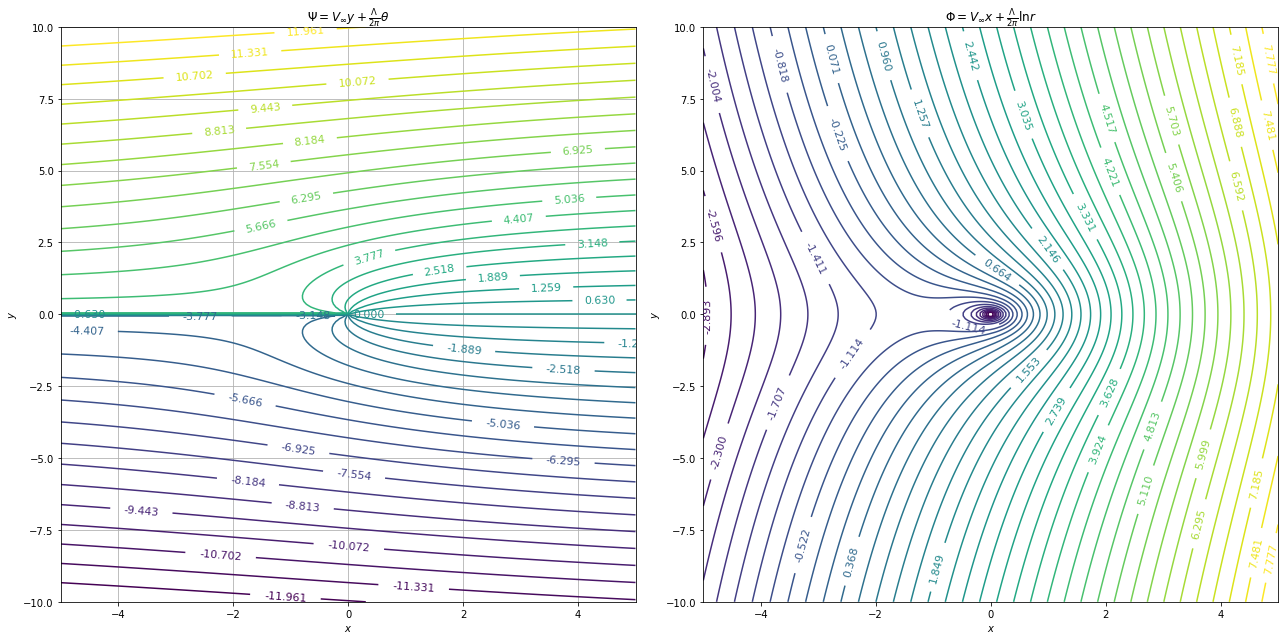

In [38]:
# Uniform Flow + Source

# Set freestream velocity
#Lambda = 2 * np.pi #  Set for convenience

Lambda = 8
Vinf = 1

plt.rcParams["figure.figsize"] = (18,9)

xr = 10
xl = -20

yu = 10;
yl = -yu

xl = -5
xr = 5

# Set x, y  points
npoints = 200
x = np.linspace(xl, xr, npoints*2)
y = np.linspace(yl, yu, npoints)

X, Y = np.meshgrid(x, y)

# Psi
plt.subplot(1,2,1)

Z = Vinf * Y + (Lambda)/(2 * np.pi) * np.arctan2(Y,X)
levels = np.linspace(np.min(Z),np.max(Z),41)
CS = plt.contour(X, Y, Z, levels=levels)
plt.clabel(CS, inline=1, fontsize=11)

plt.title(r'$\Psi = V_\infty y + \frac{\Lambda}{2 \pi} \theta$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

#Phi
plt.subplot(1,2,2)
Z = Vinf * X + (Lambda)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )

#plt.contour(Z,np.linspace(Z.min(),Z.max(),15))
#levels = np.linspace(np.min(Z),0.0035,11)
levels = np.linspace(np.min(Z),np.max(Z),41)

CS = plt.contour(X, Y, Z, levels=levels)
#CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=11)


plt.title(r'$\Phi = V_\infty x + \frac{\Lambda}{2 \pi} \ln r $')
plt.xlabel('$x$')
plt.ylabel('$y$')


plt.tight_layout()
plt.show

$$\text{Superposition of uniform Flow and source Flow}$$
$$\Psi = V_\infty x + \frac{\Lambda}{2 \pi} \theta\\$$
$$\Phi = V_\infty y + \frac{\Lambda}{2 \pi} \ln r $$

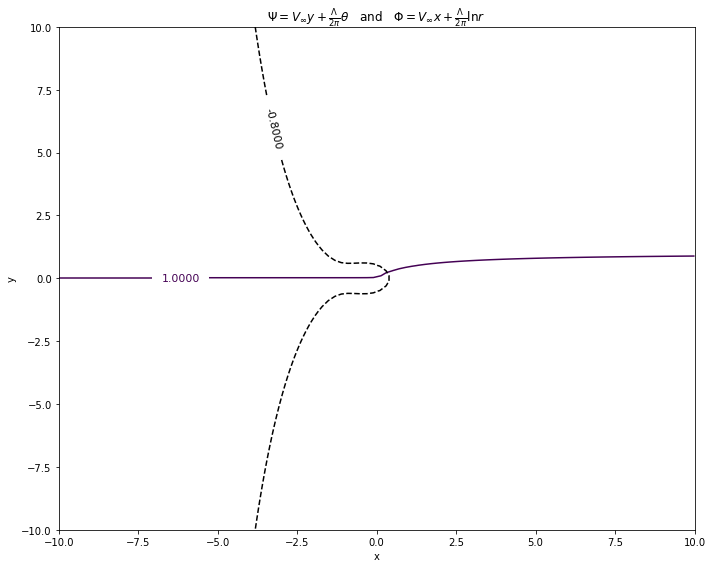

In [18]:
# Superposition of uniform Flow and source Flow interactive chart

def uniformAndSourcePlot(C, C2, Lambda):
    # Set freestream velocity
    Vinf = 1 # (units: m/s)
    plt.rcParams["figure.figsize"] = (10,8)
    # Set range
    xr = 10
    xl = -xr
    yu = 10
    yl = -yu
       
    # Set x, y  points
    npoints = 100
    x = np.linspace(xl, xr, npoints)
    y = np.linspace(yl, yu, npoints)
    X, Y = np.meshgrid(x, y)
    
    
    Z = Vinf * Y + (Lambda)/(2 * np.pi) * np.arctan2(Y,X)
    CS = plt.contour(X, Y, Z, levels=[C])
    fmt='%1.4f'
    plt.clabel(CS, inline=1, fontsize=11, fmt=fmt)
    

    Z = Vinf * X + (Lambda)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )
    CS2 = plt.contour(X, Y, Z, levels=[C2], colors='k',linestyles='dashed')
    plt.clabel(CS2, inline=1, fontsize=11, fmt=fmt)
    
    plt.title(r'$\Psi = V_\infty y + \frac{\Lambda}{2 \pi} \theta$   and   $\Phi = V_\infty x + \frac{\Lambda}{2 \pi} \ln r $')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()
    
interactive_plot = interactive(uniformAndSourcePlot, C=widgets.FloatSlider(value=1,min=-10,max=10,step=0.2,description='$\Psi$'), C2=widgets.FloatSlider(value=-0.8,min=-10,max=10,step=0.2,description='$\Phi$'), Lambda=widgets.FloatSlider(value=8,min=0.5,max=10,step=0.5,description='$\Lambda$'));
interactive_plot.children[0].layout.height = '30px'
interactive_plot.children[0].layout.width = '500px'
interactive_plot.children[0].readout_format = '.4f'
interactive_plot.children[1].layout.height = '30px'
interactive_plot.children[1].layout.width = '500px'
interactive_plot.children[1].readout_format = '.4f'
interactive_plot.children[2].layout.height = '30px'
interactive_plot.children[2].layout.width = '500px'
interactive_plot.children[2].readout_format = '.4f'
interactive_plot
#print(interactive_plot.children[1].keys)

In [19]:
# Rankine Oval

<function matplotlib.pyplot.show>

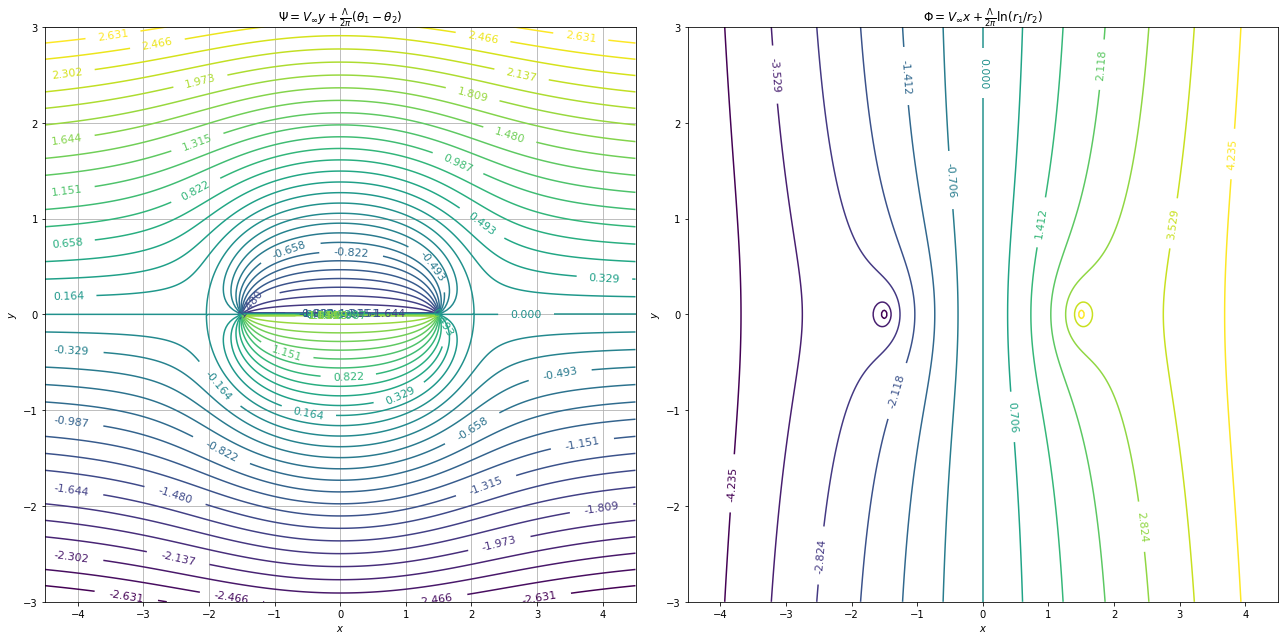

In [30]:
Lambda = 4
Vinf = 1

plt.rcParams["figure.figsize"] = (18,9)

xr = 4.5
xl = -xr

yu = 3;
yl = -yu


# Set x, y  points
npoints = 200
x = np.linspace(xl, xr, npoints*2)
y = np.linspace(yl, yu, npoints)

X, Y = np.meshgrid(x, y)

xloc = 1.5
# Psi
plt.subplot(1,2,1)
Z = Vinf * Y + (Lambda)/(2 * np.pi) * np.arctan2(Y,X + xloc) - (Lambda)/(2 * np.pi) * np.arctan2(Y,X - xloc)
#CS = plt.contour(X, Y, Z)
levels = np.linspace(np.min(Z),np.max(Z),35)
CS = plt.contour(X, Y, Z, levels=levels)
plt.clabel(CS, inline=1, fontsize=11)
#plt.axis('equal','box')
#plt.title('Simplest default with labels')
plt.title(r'$\Psi = V_\infty y + \frac{\Lambda}{2 \pi} (\theta_1-\theta_2)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
#plt.xlim(-0.1, .1)
plt.grid()

#Phi
plt.subplot(1,2,2)

Z = Vinf * X + (Lambda)/(2 * np.pi) * np.log( np.sqrt(np.power(X + xloc,2) + np.power(Y,2)) ) - (Lambda)/(2 * np.pi) * np.log( np.sqrt(np.power(X - xloc,2) + np.power(Y,2)) )

#plt.contour(Z,np.linspace(Z.min(),Z.max(),15))
#levels = np.linspace(np.min(Z),0.0035,11)
levels = np.linspace(np.min(Z),np.max(Z),15)

CS = plt.contour(X, Y, Z, levels=levels)
#CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=11)


plt.title(r'$\Phi = V_\infty x + \frac{\Lambda}{2 \pi} \ln (r_1/r_2) $')
plt.xlabel('$x$')
plt.ylabel('$y$')


plt.tight_layout()
plt.show

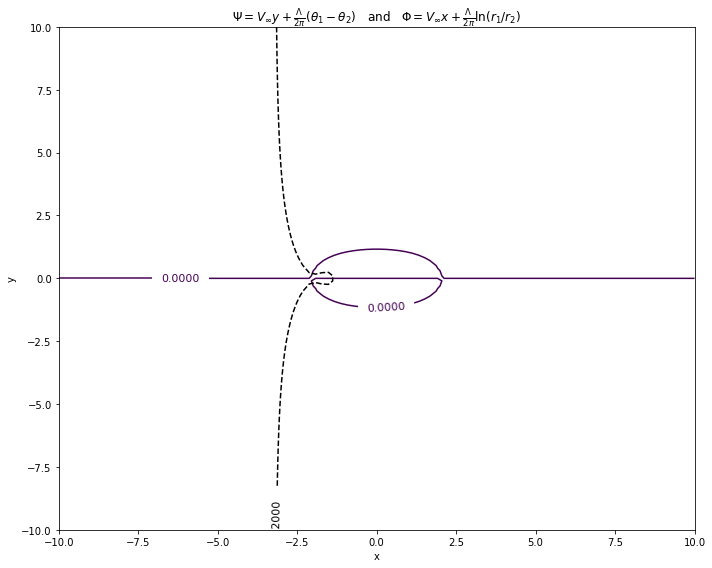

In [21]:
# Rankine Oval interactive chart

def rankineOvalPlot(C, C2, Lambda,xloc):
    # Set freestream velocity
    Vinf = 1 # (units: m/s)
    plt.rcParams["figure.figsize"] = (10,8)
    # Set range
    xr = 10
    xl = -xr
    yu = 10
    yl = -yu
       
    # Set x, y  points
    npoints = 100
    x = np.linspace(xl, xr, npoints)
    y = np.linspace(yl, yu, npoints)
    X, Y = np.meshgrid(x, y)
    
    
    Z = Vinf * Y + (Lambda)/(2 * np.pi) * np.arctan2(Y,X + xloc) - (Lambda)/(2 * np.pi) * np.arctan2(Y,X - xloc)
    CS = plt.contour(X, Y, Z, levels=[C])
    fmt='%1.4f'
    plt.clabel(CS, inline=1, fontsize=11, fmt=fmt)
    

    Z = Vinf * X + (Lambda)/(2 * np.pi) * np.log( np.sqrt(np.power(X + xloc,2) + np.power(Y,2)) ) - (Lambda)/(2 * np.pi) * np.log( np.sqrt(np.power(X - xloc,2) + np.power(Y,2)) )
    CS2 = plt.contour(X, Y, Z, levels=[C2], colors='k',linestyles='dashed')
    plt.clabel(CS2, inline=1, fontsize=11, fmt=fmt)
    
    plt.title(r'$\Psi = V_\infty y + \frac{\Lambda}{2 \pi} (\theta_1-\theta_2)$   and   $\Phi = V_\infty x + \frac{\Lambda}{2 \pi} \ln (r_1/r_2) $')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()
    
interactive_plot = interactive(rankineOvalPlot, C=widgets.FloatSlider(value=0,min=-10,max=10,step=0.1,description='$\Psi$'), C2=widgets.FloatSlider(value=-3.2,min=-10,max=10,step=0.1,description='$\Phi$'), Lambda=widgets.FloatSlider(value=4,min=0.5,max=10,step=0.5,description='$\Lambda$'), xloc=widgets.FloatSlider(value=1.5,min=0.25,max=5,step=0.25,description='$xLoc$'));
interactive_plot.children[0].layout.height = '30px'
interactive_plot.children[0].layout.width = '500px'
interactive_plot.children[0].readout_format = '.4f'
interactive_plot.children[1].layout.height = '30px'
interactive_plot.children[1].layout.width = '500px'
interactive_plot.children[1].readout_format = '.4f'
interactive_plot.children[2].layout.height = '30px'
interactive_plot.children[2].layout.width = '500px'
interactive_plot.children[2].readout_format = '.4f'
interactive_plot.children[3].layout.height = '30px'
interactive_plot.children[3].layout.width = '500px'
interactive_plot.children[3].readout_format = '.4f'
interactive_plot
#print(interactive_plot.children[1].keys)

In [22]:
# Cylinder (Non-lifting flow)

In [23]:
# Cylinder (Lifting flow)